In [1]:
from matplotlib import pyplot as plt 
import os 
import pandas as pd 
import numpy as np 

In [2]:
d = "/eos/user/a/atishelm/www/HHWWgg/DNN/HHWWyyDNN_MultiClass_2Hgg_HggClassWeightFactor2_BalanceYields/Categorization/"

In [2]:
# files = ["%s/%s"%(d,f) for f in os.listdir(d) if "v2.txt" in f]
files = ["/eos/user/b/bmarzocc/HHWWgg/January_2021_Production/HHWWyyDNN_binary_EFT_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel/categorize_nBins_380_nCat_4_massMin115.0_massMax135.0_v2.txt"]

In [3]:
print("num files:",len(files))
# for f in files:
#     print(f.split('/')[-1])
# print("files_sOversqrtB",files_sOversqrtB)

num files: 1


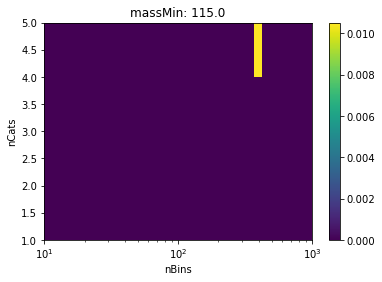

Saving info for: 115.0, 1


IndexError: too many indices for array

In [4]:
massMins = [115.0, 120.0, 121.0, 122.0, 123.0]
for massMintoPlot in massMins:
    NCats_vals, nBins_vals, sig_vals = [], [], []
    for i, file in enumerate(files):
        endPathArgs = file.split('/')[-1].split('_')
        massMin = endPathArgs[5] 
        massMin = massMin.replace("massMin", "")
        massMin = float(massMin)
        nBins = float(endPathArgs[2])
        nCatsLabel = endPathArgs[4]
        if(massMin != massMintoPlot): continue 
            
        ##-- Fill with category information
        df = pd.read_csv(file, header=None)
        Nrows = len(df.index)
        Ncats = Nrows - 1 
        
        ##-- Only get total significance
        row = df.iloc[-1, 0]
        rowEntries = row.split()
        Significance = float(rowEntries[-1])
        NCats_vals.append(Ncats)
        nBins_vals.append(nBins)
        sig_vals.append(Significance)

    xBinning = np.linspace(10, 1000, 20)
    yBinning = np.linspace(1, 5, 5)        
        
    fig, ax = plt.subplots()
    plt.title("massMin: %s"%(massMintoPlot))
#     plt.hist2d(nBins_vals, NCats_vals, weights = sig_vals)
    plt.hist2d(nBins_vals, NCats_vals, weights = sig_vals, bins = [xBinning, yBinning])
    plt.xscale('log')
    plt.xlabel("nBins")
    plt.ylabel("nCats")
    plt.colorbar()
    plt.show()
    plt.close()        
        
#     print("max sig:",max(sig_vals))
#     print("NCats_vals:",NCats_vals)
#     print("nBins_vals:",nBins_vals)
#     print("sig_vals:",sig_vals)
    
    ##-- Make plot for each nCats 
    for numcats in [1, 2, 3, 4, 5]:
        print("Saving info for: %s, %s"%(massMintoPlot, numcats))
        sigs_, bins_ = [], []
        for ival, val in enumerate(NCats_vals):
            if(val == numcats):
#                 print("saving info from ncats:",val)
                sigs_.append(sig_vals[ival])
                bins_.append(nBins_vals[ival])
    
        zippedLists = zip(bins_, sigs_)
        sortedLists = np.array(sorted(zippedLists)) 
        massMintoPlot_str = str(massMintoPlot).replace(".", "p")
#         print("--------------------------")
#         print("Saving values:")
#         print("massMintoPlot_str",massMintoPlot_str)
#         print("numcats",numcats)
#         print("sortedLists:",sortedLists)
#         print("sortedLists[:,0]:",sortedLists[:,0])
#         print("sortedLists[:,1]:",sortedLists[:,1])
#         print("--------------------------")
        exec("bins_massMin_%s_nCats_%s = sortedLists[:,0]"%(massMintoPlot_str, str(numcats)))
        exec("sigs_massMin_%s_nCats_%s = sortedLists[:,1]"%(massMintoPlot_str, str(numcats)))
#         print("bins:",bins_massMin_%s_nCats_%s"%(massMintoPlot_str, str(numcats)))
#         exec("print(sigs_massMin_%s_nCats_%s)"%(massMintoPlot_str, str(numcats)))
#         print("sigs:",sigs_massMin_%s_nCats_%s"%(massMintoPlot_str, str(numcats)))
    
##-- One plot per number of categories 

maxSignificance = -999
maxSig_Bins = -999
maxSig_NCats = -999
maxSig_massMin = -999

SecondSignificance = -999
SecondSig_Bins = -999
SecondSig_NCats = -999
SecondSig_massMin = -999

for numcats in [1, 2, 3, 4, 5]:
    fig, ax = plt.subplots()
    ##-- One line per massMin
    for massMintoPlot in massMins:
        massMintoPlot_str = str(massMintoPlot).replace(".", "p")
#         print("--------------------------")
#         print("Plotting values:")
#         print("massMintoPlot_str",massMintoPlot_str)
#         print("numcats",numcats)
#         print("--------------------------")        
        exec("bins = bins_massMin_%s_nCats_%s"%(massMintoPlot_str, str(numcats)))
        exec("sigs = sigs_massMin_%s_nCats_%s"%(massMintoPlot_str, str(numcats)))
        
        for sig_i, sig in enumerate(sigs):
            if(sig > maxSignificance):
                maxSignificance = sig 
                maxSig_Bins = bins[sig_i]
                maxSig_NCats = numcats
                maxSig_massMin = massMintoPlot
                
        for sig_i, sig in enumerate(sigs):
            if((sig > SecondSignificance) and (sig < maxSignificance) ):
                SecondSignificance = sig 
                SecondSig_Bins = bins[sig_i]
                SecondSig_NCats = numcats
                SecondSig_massMin = massMintoPlot                
        
                
#         exec("print(sigs_massMin_%s_nCats_%s)"%(massMintoPlot_str, str(numcats)))
        plt.plot(bins, sigs, '-o', label = "massMin = %s"%(massMintoPlot))
    plt.title("Significance vs. nBins: %s Categories"%(numcats))
    plt.xscale('log')
    plt.xlabel("nBins")
    plt.ylabel("Total Significance")
    plt.legend()
    plt.show()
    plt.close()
        

print("---")
print("Maximum significance case:")
print("Significance:",maxSignificance)
print("Bins:",maxSig_Bins)
print("NCats:",maxSig_NCats)
print("Minimum mass:",maxSig_massMin)
print("---")
        
print("---")
print("Second highest significance case:")
print("Significance:",SecondSignificance)
print("Bins:",SecondSig_Bins)
print("NCats:",SecondSig_NCats)
print("Minimum mass:",SecondSig_massMin)
print("---")
            
        
    
#         bins = sortedLists[:,0]
#         sigs = sortedLists[:,1]
#         fig, ax = plt.subplots()
#         plt.title("NCats: %s, massMin: %s"%(numcats, massMintoPlot))
#         plt.plot(bins, sigs, 'o-')
#         plt.show()
#         plt.close()
                
        
#     xBinning = np.linspace(10, 200, 21)
#     yBinning = np.linspace(1, 5, 5)
    

print("DONE")
    


NCats_vals [4]
nBins_vals [380.0]
sig_vals [0.0105262808801]


ValueError: not enough values to unpack (expected 2, got 1)

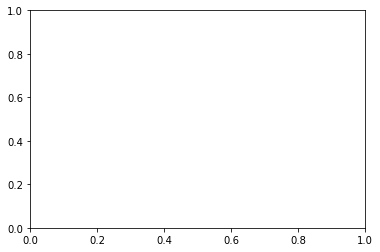

In [5]:
# make these smaller to increase the resolution
dx, dy = 0.15, 0.05



y, x = np.mgrid[-3:3+dy:dy, -3:3+dx:dx]

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
sig_min, sig_max = np.min(Significance), np.max(abs(Significance))

fig, ax = plt.subplots()

print("NCats_vals", NCats_vals)
print("nBins_vals", nBins_vals)
print("sig_vals", sig_vals)

c = ax.pcolormesh(np.array(NCats_vals), np.array(nBins_vals), np.array(sig_vals), cmap='RdBu', vmin=sig_min, vmax=sig_max)
ax.set_title('pcolor')
fig.colorbar(c, ax=ax)

# ax = axs[0, 1]
# c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
# ax.set_title('pcolormesh')
# fig.colorbar(c, ax=ax)

# ax = axs[1, 0]
# c = ax.imshow(z, cmap='RdBu', vmin=z_min, vmax=z_max,
#               extent=[x.min(), x.max(), y.min(), y.max()],
#               interpolation='nearest', origin='lower', aspect='auto')
# ax.set_title('image (nearest, aspect="auto")')
# fig.colorbar(c, ax=ax)

# ax = axs[1, 1]
# c = ax.pcolorfast(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
# ax.set_title('pcolorfast')
# fig.colorbar(c, ax=ax)

fig.tight_layout()
plt.show()    
plt.close()    

            
print("DONE")
        
#         print("    %s & %s & %s & %s & %s & %s & %s \\\ "%(CatNum, DNNscoreMin, DNNscoreMax, Nsignal, Nbkg, NSB, Significance))
    

x: [[-3.   -2.85 -2.7  ...  2.85  3.    3.15]
 [-3.   -2.85 -2.7  ...  2.85  3.    3.15]
 [-3.   -2.85 -2.7  ...  2.85  3.    3.15]
 ...
 [-3.   -2.85 -2.7  ...  2.85  3.    3.15]
 [-3.   -2.85 -2.7  ...  2.85  3.    3.15]
 [-3.   -2.85 -2.7  ...  2.85  3.    3.15]]
y: [[-3.   -3.   -3.   ... -3.   -3.   -3.  ]
 [-2.95 -2.95 -2.95 ... -2.95 -2.95 -2.95]
 [-2.9  -2.9  -2.9  ... -2.9  -2.9  -2.9 ]
 ...
 [ 2.9   2.9   2.9  ...  2.9   2.9   2.9 ]
 [ 2.95  2.95  2.95 ...  2.95  2.95  2.95]
 [ 3.    3.    3.   ...  3.    3.    3.  ]]
z: [[-4.07401958e-06 -7.78688374e-06 -1.41583137e-05 ...  9.77960320e-06
   5.88231752e-06  3.28206063e-06]
 [-5.45839441e-06 -1.04194741e-05 -1.89134756e-05 ...  1.33186513e-05
   7.98594644e-06  4.44648209e-06]
 [-7.27774767e-06 -1.38749305e-05 -2.51448058e-05 ...  1.80389190e-05
   1.07841502e-05  5.99253582e-06]
 ...
 [-7.96075258e-06 -1.43092961e-05 -2.38935839e-05 ...  3.36742333e-05
   1.85634925e-05  9.72973750e-06]
 [-5.93758641e-06 -1.06520035e-05 -1.7

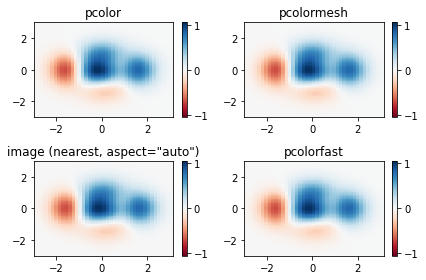

In [23]:
# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[-3:3+dy:dy, -3:3+dx:dx]
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -abs(z).max(), abs(z).max()

print("x:",x)
print("y:",y)
print("z:",z)

print("len(x):",len(x))
print("len(y):",len(y))
print("len(z):",len(z))

fig, axs = plt.subplots(2, 2)

ax = axs[0, 0]
c = ax.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolor')
fig.colorbar(c, ax=ax)

ax = axs[0, 1]
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)

ax = axs[1, 0]
c = ax.imshow(z, cmap='RdBu', vmin=z_min, vmax=z_max,
              extent=[x.min(), x.max(), y.min(), y.max()],
              interpolation='nearest', origin='lower', aspect='auto')
ax.set_title('image (nearest, aspect="auto")')
fig.colorbar(c, ax=ax)

ax = axs[1, 1]
c = ax.pcolorfast(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolorfast')
fig.colorbar(c, ax=ax)

fig.tight_layout()
plt.show()

In [6]:
##-- Make table for each Number of categories for a given binning, 

roundPlace = 5

for i, file in enumerate(files):
    ##-- Begin Table
    print("\\begin{table}[H]")
    print("  \\begin{center}")
    print("    \\begin{tabular}{c|c|c|c|c|c|c}")
    print("    CatN & DNN Min & DNN Max & S & $B_{SR}$ & $Data_{Sideband}$ & Significance\\\ \\hline")    
    
    ##-- Fill with category information
    df = pd.read_csv(file, header=None)
    Nrows = len(df.index)
    Ncats = Nrows - 1 
#     print("Nrows:",Nrows)
#     print("First Category:",df.iloc[-2,:])
    
    ##-- Get: 
    # Category Number, DNN score Min, DNN score max, Nsignal, NBkg, Significance 
    for irow in range(0, Ncats):
        thisRow = (irow * -1) - 2  
    #     print("thisRow:",thisRow)
        row = df.iloc[thisRow, 0]
        rowEntries = row.split()
        CatNum = irow
        DNNscoreMin = round(float(rowEntries[0]), roundPlace) 
        DNNscoreMax = round(float(rowEntries[1]), roundPlace)
        Nsignal = round(float(rowEntries[5]),roundPlace)
        NSB = round(float(rowEntries[-1]), roundPlace)
#         Ncont = round(float(rowEntries[7]), roundPlace)
#         NVH = round(float(rowEntries[9]), roundPlace)
#         NttH = round(float(rowEntries[11]), roundPlace)
        Nbkg = round(float(rowEntries[7]), roundPlace)
        Significance = round(float(rowEntries[3]), roundPlace)

        print("    %s & %s & %s & %s & %s & %s & %s \\\ "%(CatNum, DNNscoreMin, DNNscoreMax, Nsignal, Nbkg, NSB, Significance))
#         print("    %s & %s & %s & %s & %s & %s & %s & %s & %s \\\ "%(CatNum, DNNscoreMin, DNNscoreMax, Nsignal, Nbkg, Ncont, NVH, NttH, Significance))
    
    ##-- Finish table
    print("    \\end{tabular}")
    print("  \\end{center}")
    print("\\caption{")
    print("    Semi-Leptonic DNN Category Boundaries and yields in signal region for %s Categories"%(Ncats))
    print("}")
    print("\\label{tab:SLcategories_%s}"%(Ncats))
    print("\\end{table}")
    print(" ")
    


\begin{table}[H]
  \begin{center}
    \begin{tabular}{c|c|c|c|c|c|c}
    CatN & DNN Min & DNN Max & S & $B_{SR}$ & $Data_{Sideband}$ & Significance\\ \hline
    0 & 0.99763 & 1.0 & 0.02696 & 9.69385 & 71.0 & 0.00866 \\ 
    1 & 0.98579 & 0.99763 & 0.0327 & 48.65192 & 85.0 & 0.00469 \\ 
    2 & 0.74658 & 0.98579 & 0.08363 & 539.39256 & 1081.0 & 0.0036 \\ 
    3 & 0.1 & 0.74658 & 0.04886 & 2494.74576 & 5660.0 & 0.00098 \\ 
    \end{tabular}
  \end{center}
\caption{
    Semi-Leptonic DNN Category Boundaries and yields in signal region for 4 Categories
}
\label{tab:SLcategories_4}
\end{table}
 


In [33]:
##-- To plot both together

roundPlace = 6

fig, ax = plt.subplots()

NCats_vals = []
Tot_Sig_vals = []

for i, file in enumerate(files):
    df = pd.read_csv(file, header=None)
    NCats = len(df.index) - 1 
    NCats_vals.append(NCats)
    Tot_Sig = float(df.iloc[-1,-1].split(' ')[-1])
    Tot_Sig_vals.append(Tot_Sig)
    
print("NCats_vals:",NCats_vals)
print("Tot_Sig_vals:",Tot_Sig_vals)
    
plt.plot(NCats_vals, Tot_Sig_vals, 'o-', label = "General Expression")
    
NCats_vals_SoversqrtB = []
Tot_Sig_vals_SoversqrtB = []

for i, file in enumerate(files_sOversqrtB):
    df = pd.read_csv(file, header=None)
    NCats = len(df.index) - 1 
    NCats_vals_SoversqrtB.append(NCats)
    Tot_Sig = float(df.iloc[-1,-1].split(' ')[-1])
    Tot_Sig_vals_SoversqrtB.append(Tot_Sig)
    
print("NCats_vals_SoversqrtB:",NCats_vals_SoversqrtB)
print("Tot_Sig_vals_SoversqrtB:",Tot_Sig_vals_SoversqrtB)    
print("Tot_Sig_vals_SoversqrtB:",Tot_Sig_vals_SoversqrtB)    
    
yMax_soversqrtb = max(Tot_Sig_vals_SoversqrtB)
yMax_general = max(Tot_Sig_vals)
overallYmax = -999 
if(yMax_soversqrtb > yMax_general):
    overallYmax = yMax_soversqrtb
else:
    overallYmax = yMax_general
    
print("\\begin{table}[H]")
print("  \\begin{center}")
print("    \\begin{tabular}{c|c|c}")
print("    NCategories & Total Significance with Eq \\ref{eq:SignifianceDef} & $\\frac{S}{\\sqrt{B}}$ \\\ \\hline")    
print("    1 & %s & %s  \\\ "%(round(Tot_Sig_vals[0],roundPlace), round(Tot_Sig_vals_SoversqrtB[0],roundPlace)))
print("    2 & %s & %s  \\\ "%(round(Tot_Sig_vals[1],roundPlace), round(Tot_Sig_vals_SoversqrtB[1],roundPlace)))
print("    3 & %s & %s  \\\ "%(round(Tot_Sig_vals[2],roundPlace), round(Tot_Sig_vals_SoversqrtB[2],roundPlace)))
print("    4 & %s & %s  \\\ "%(round(Tot_Sig_vals[3],roundPlace), round(Tot_Sig_vals_SoversqrtB[3],roundPlace)))
print("    5 & %s & %s  \\\ "%(round(Tot_Sig_vals[4],roundPlace), round(Tot_Sig_vals_SoversqrtB[4],roundPlace)))
print("    \\end{tabular}")
print("  \\end{center}")
print("\\caption{")
print("    Significance values using two equations for significance")
print("}")
print("\\label{tab:SigVsNcats_table}")
print("\\end{table}")
print(" ")    
    
    
plt.plot(NCats_vals_SoversqrtB, Tot_Sig_vals_SoversqrtB, 'o-', label = r"S / $\sqrt{B}$")
plt.legend(loc = 'best')
plt.xlabel("Number of Categories", fontsize = 15)
plt.ylabel("Significance", fontsize = 15)
plt.ylim(0, overallYmax*1.1)
plt.tight_layout()
# plt.show()
plt.savefig("%s/SigVsNCats.png"%(d))
plt.savefig("%s/SigVsNCats.pdf"%(d))
plt.close()
print("DONE")

NCats_vals: [1, 2, 3, 4, 5]
Tot_Sig_vals: [0.0329922790805, 0.0337958410606, 0.0380231750868, 0.0397628838051, 0.0404737782575]
NCats_vals_SoversqrtB: [1, 2, 3, 4, 5]
Tot_Sig_vals_SoversqrtB: [0.0331510743721, 0.0339509521894, 0.0382341675516, 0.0399754140597, 0.0406839576573]
\begin{table}[H]
  \begin{center}
    \begin{tabular}{c|c|c}
    NCategories & Total Significance with Eq \ref{eq:SignifianceDef} & $\frac{S}{\sqrt{B}}$ \\ \hline
    1 & 0.032992 & 0.033151  \\ 
    2 & 0.033796 & 0.033951  \\ 
    3 & 0.038023 & 0.038234  \\ 
    4 & 0.039763 & 0.039975  \\ 
    5 & 0.040474 & 0.040684  \\ 
    \end{tabular}
  \end{center}
\caption{
    Significance values using two equations for significance
}
\label{tab:SigVsNcats_table}
\end{table}
 
DONE


NCats_vals: [1, 2, 3, 4, 5]
Tot_Sig_vals: [0.0171322929157, 0.0172213680096, 0.0690187816042, 0.0691652102274, 0.0692055028059]


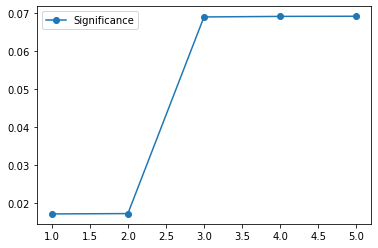

In [61]:
##-- To plot one

fig, ax = plt.subplots()

NCats_vals = []
Tot_Sig_vals = []

for i, file in enumerate(files):
    df = pd.read_csv(file, header=None)
    NCats = len(df.index) - 1 
    NCats_vals.append(NCats)
    Tot_Sig = float(df.iloc[-1,-1].split(' ')[-1])
    Tot_Sig_vals.append(Tot_Sig)
    
print("NCats_vals:",NCats_vals)
print("Tot_Sig_vals:",Tot_Sig_vals)
    
plt.plot(NCats_vals, Tot_Sig_vals, 'o-', label = "Significance")

plt.legend()
plt.show()
plt.close()

In [27]:
import ROOT
import numpy as np 

In [28]:
f = ROOT.TFile.Open("/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/evalDNN_HH/evalDNN_HH_Histos_smoothing_SmoothSuper_bins70_massMin122.0_massMax128.0.root")
Bkg_SR_h = f.Get("h_evalDNN_HH_bkg_SR_weighted_smooth")
Sig_SR_h = f.Get("h_evalDNN_HH_signal_SR")

In [34]:
Bkg_vals = []
Sig_vals = []

for bin in range(Bkg_SR_h.GetNbinsX()):
    val = Bkg_SR_h.GetBinContent(bin + 1)
    Bkg_vals.append(val)
for bin in range(Sig_SR_h.GetNbinsX()):
    val = Sig_SR_h.GetBinContent(bin + 1)
    Sig_vals.append(val)

bins = np.linspace(0.1, 1, 71)
    
# print("Bkg_vals:",Bkg_vals)    
# print("bins[:-1]:",bins[:-1])
    
fig, ax = plt.subplots()
plt.hist(bins[:-1], weights = Bkg_vals, bins = bins, label = "Background")
plt.hist(bins[:-1], weights = Sig_vals, bins = bins, label = "Signal")
plt.yscale('log')
plt.xlim(0.1, 1)
plt.xlabel("evalDNN_HH", fontsize = 15)
plt.ylabel("Number of Expected Events", fontsize = 15)
plt.legend(loc = 'best')
plt.tight_layout()
# plt.show()
plt.savefig("/eos/user/a/atishelm/www/HHWWgg/DNN/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/Categorization_UpdatedSmoothingNoNegatives/Bkg_Sig_SR_evalDNN_HH.png")
plt.savefig("/eos/user/a/atishelm/www/HHWWgg/DNN/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/Categorization_UpdatedSmoothingNoNegatives/Bkg_Sig_SR_evalDNN_HH.pdf")
plt.close()

print("DONE")
    

DONE


In [2]:
import uproot

In [65]:
file = uproot.open("https://scikit-hep.org/uproot3/examples/hepdata-example.root")
file.classnames()
file["hpx"].all_members

AttributeError: 'TH1F' object has no attribute 'all_members'

In [60]:


##-- Make signal, smoothed background DNN score plot in signal region
file = "/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/evalDNN_HH/evalDNN_HH_Histos_smoothing_SmoothSuper_bins70_massMin122.0_massMax128.0.root"
f = uproot.open(file)
# print(f.keys())
# print(" ")
# print(f.classnames())
for item in f.classnames():
    print(item)

Bkg_SR_h = f["h_evalDNN_HH_bkg_SR_weighted_smooth"]
Signal_SR_h = f["h_evalDNN_HH_signal_SR"]

(b'h_evalDNN_HH_bkg_SR_weighted;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_weighted_smooth;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_weighted_smooth_up;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_weighted_smooth_down;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_smooth;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_smooth_up;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_smooth_down;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth;2', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth_up;2', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth_up;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth_down;2', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth_down;1', 'TH1F')
(b'h_evalDNN_HH_data_SB;1', 'TH1F')
(b'h_evalDNN_HH_VHtoGG_SR_2017;1', 'TH1F')
(b'h_evalDNN_HH_VHtoGG_SR_2017_smooth;1', 'TH1F')
(b'h_evalDNN_HH_VHtoGG_SR_2017_smooth_up;1', 'TH1F')
(b'h_evalDNN_HH_VHtoGG_SR_2017_smooth_down;1', 'TH1F')
(b'h_evalDNN_HH_ttHtoGG

In [63]:
Bkg_SR_h.all_members

AttributeError: 'TH1F' object has no attribute 'all_members'

In [53]:

##-- https://indico.cern.ch/event/697389/contributions/3102807/attachments/1713054/2762448/Writing_files_with_uproot.pdf

# a = Bkg_SR_h.to_numpy()


# Bkg_SR_values = Bkg_SR_h.values()


# fig, ax = plt.subplots()
# plt.hist(Bkg_SR_h)
# plt.show()
# plt.close()

AttributeError: 'TH1F' object has no attribute 'print'